# Dataset Information

   Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
   
   This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.
   
Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)

## Import modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
df = pd.read_csv("Loan Prediction Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing the dataset

In [7]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='count', ylabel='Gender'>

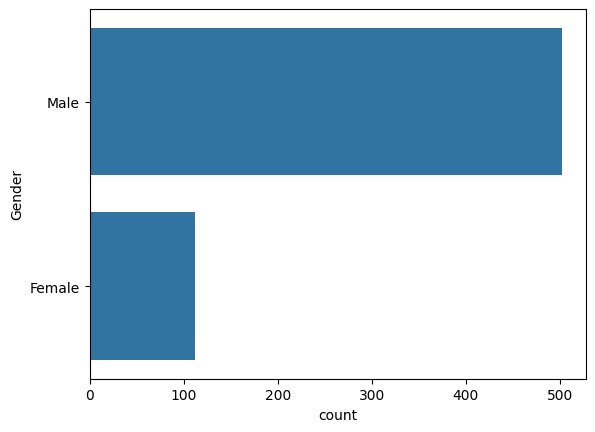

In [11]:
# categorical attributes visualization
sns.countplot(df['Gender'])

<Axes: xlabel='count', ylabel='Married'>

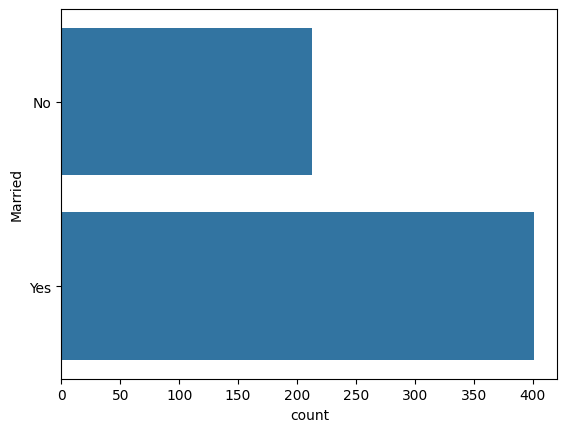

In [10]:
sns.countplot(df['Married'])

<Axes: xlabel='count', ylabel='Dependents'>

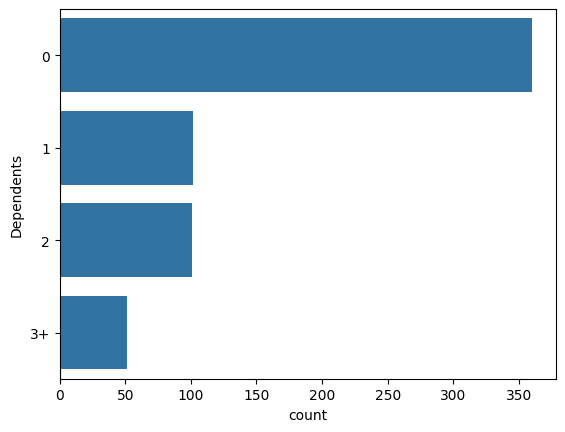

In [11]:
sns.countplot(df['Dependents'])

<Axes: xlabel='count', ylabel='Education'>

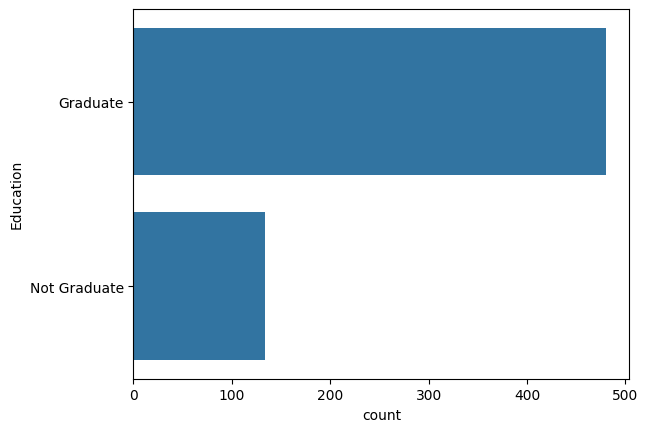

In [12]:
sns.countplot(df['Education'])

<Axes: xlabel='count', ylabel='Self_Employed'>

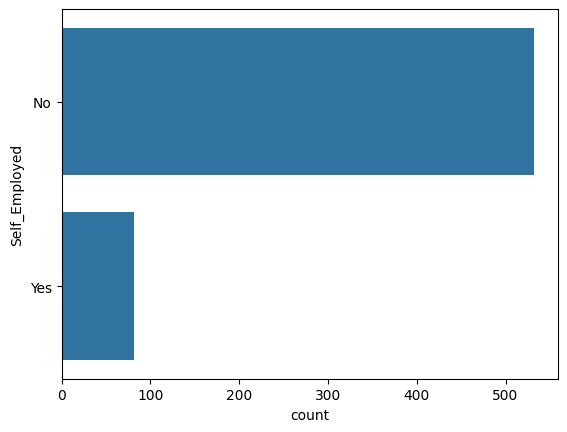

In [13]:
sns.countplot(df['Self_Employed'])

<Axes: xlabel='count', ylabel='Property_Area'>

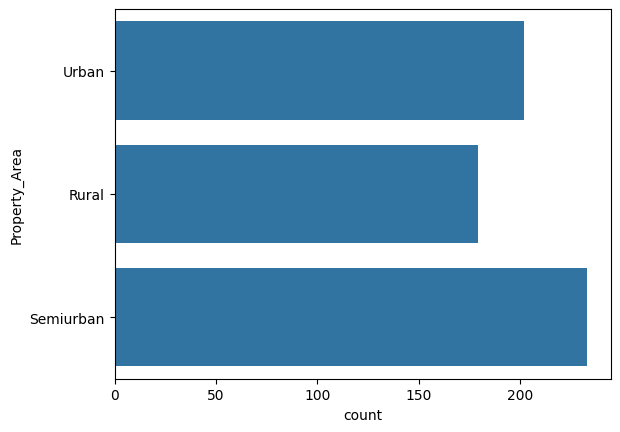

In [14]:
sns.countplot(df['Property_Area'])

<Axes: xlabel='count', ylabel='Loan_Status'>

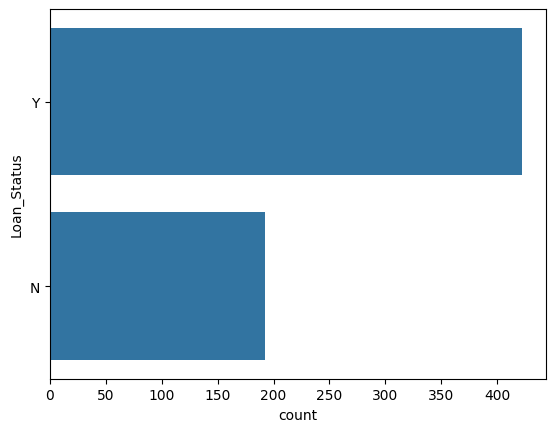

In [15]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome'>

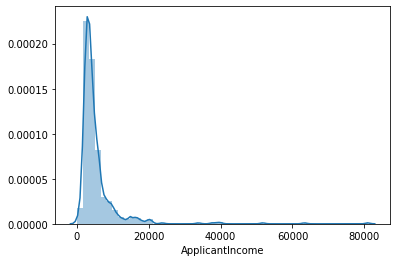

In [16]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome'>

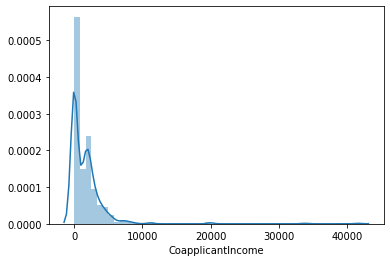

In [17]:
sns.distplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount'>

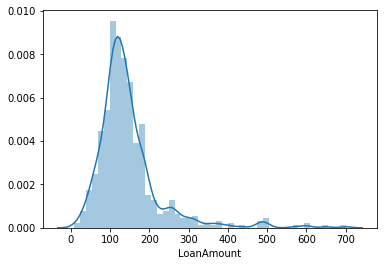

In [18]:
sns.distplot(df["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term'>

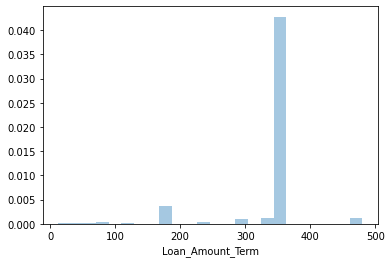

In [19]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History'>

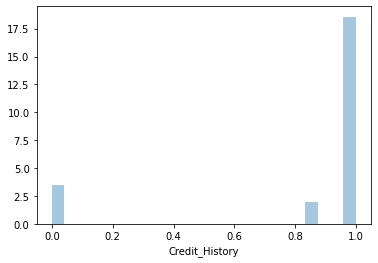

In [20]:
sns.distplot(df['Credit_History'])

## Creation of new attributes

In [12]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Log Transformation

<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

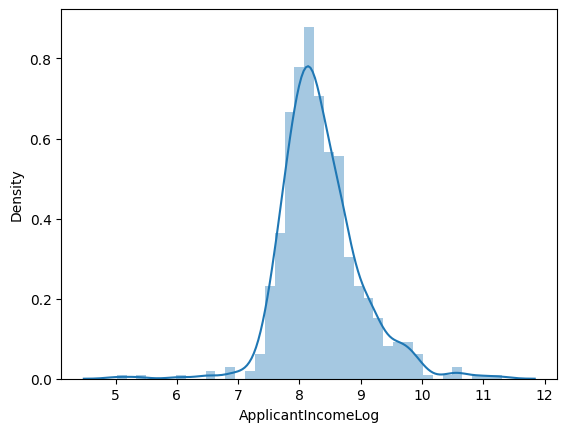

In [13]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncomeLog"])

<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

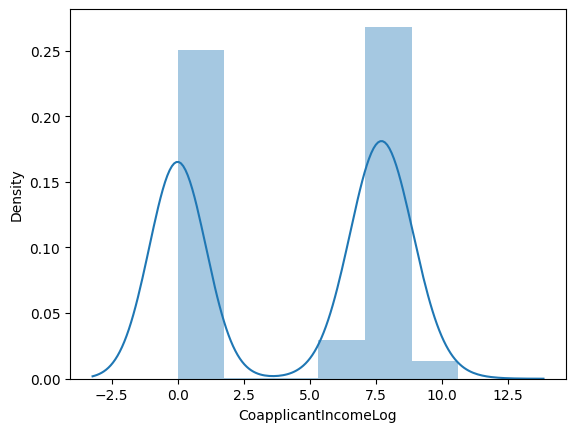

In [14]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

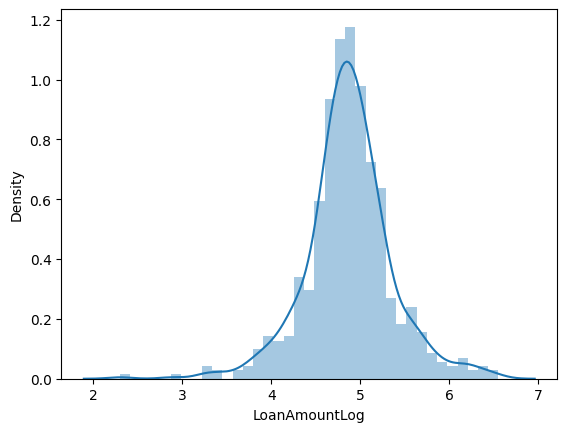

In [15]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log'>

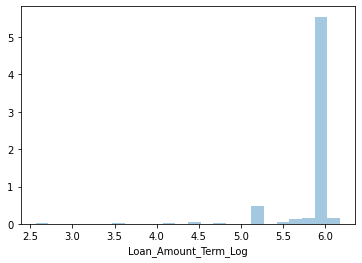

In [25]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log'>

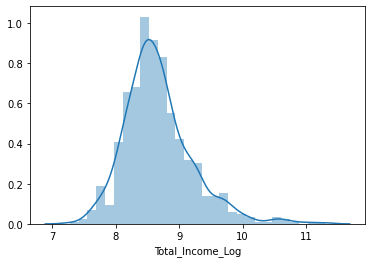

In [26]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"])

## Coorelation Matrix

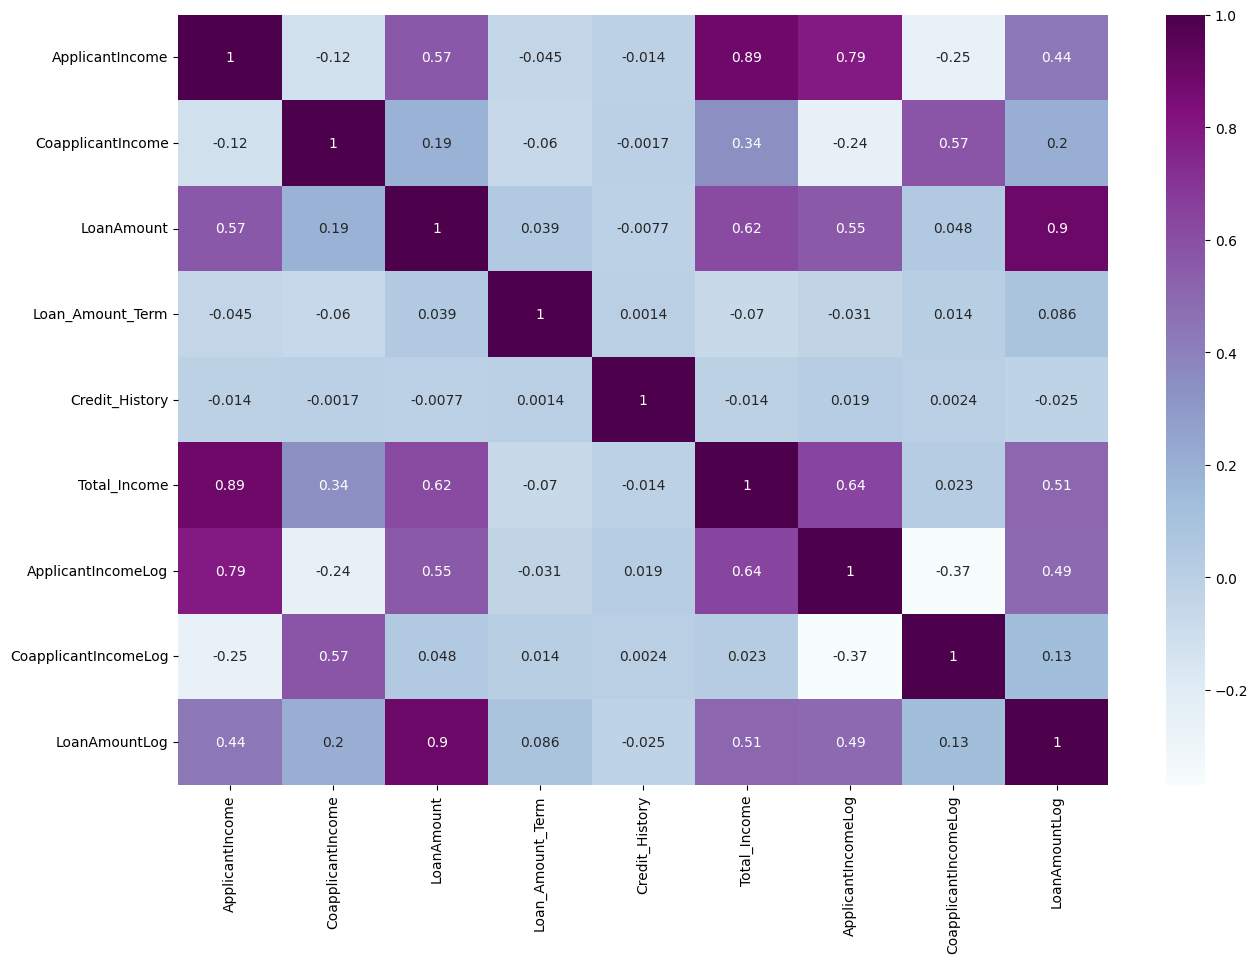

In [16]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="BuPu")
plt.show()


In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827


In [19]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827


## Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827


## Train-Test Split

In [34]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Training

In [24]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.94628815140611


In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 73.37662337662337
Cross validation is 71.1795281887245


In [27]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 77.85552445688391


In [28]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 73.37662337662337
Cross validation is 74.76076236172197


## Hyperparameter tuning

In [29]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.45848327335733


## Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [30]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[25, 29],
       [ 4, 96]])

<Axes: >

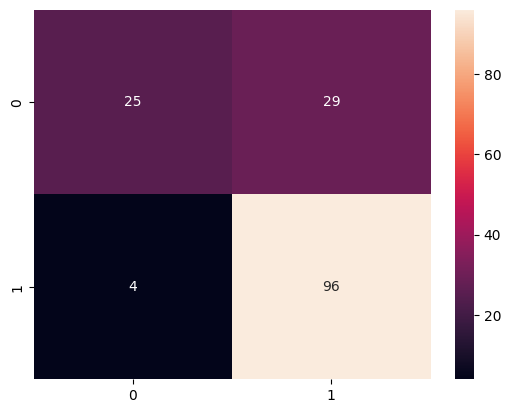

In [32]:
sns.heatmap(cm, annot=True)

## K-Nearest Neighbors (KNN) classification 

In [35]:
# Define features and target variable
X = df.drop(columns=['Loan_Status'])  # Features
y = df['Loan_Status']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize KNN with a chosen number of neighbors (e.g., 5)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.745945945945946
Confusion Matrix:
 [[ 29  36]
 [ 11 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.45      0.55        65
           1       0.75      0.91      0.82       120

    accuracy                           0.75       185
   macro avg       0.74      0.68      0.69       185
weighted avg       0.74      0.75      0.73       185



In [38]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'n_neighbors': range(1, 20)}

# Initialize grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'n_neighbors': 16}
Best Score: 0.8158139534883722


## FEATURE ENGINEERING

In [42]:
import numpy as np

# Assuming df is your DataFrame with the specified columns

# Step 1: Exponentiate the log-transformed income and loan amount to get back their original values
df['ApplicantIncome'] = np.exp(df['ApplicantIncomeLog'])
df['LoanAmount'] = np.exp(df['LoanAmountLog'])

# Step 2: Calculate the Income-to-Loan ratio
df['Income_to_Loan_Ratio'] = df['ApplicantIncome'] / df['LoanAmount']

# Optional: Take the log of the ratio to maintain the logarithmic transformation
df['Income_to_Loan_Ratio_Log'] = np.log(df['Income_to_Loan_Ratio'])

# Step 3: Check if the new feature has been added correctly
print(df[['ApplicantIncomeLog', 'LoanAmountLog', 'ApplicantIncome', 'LoanAmount', 'Income_to_Loan_Ratio', 'Income_to_Loan_Ratio_Log']].head())


   ApplicantIncomeLog  LoanAmountLog  ApplicantIncome  LoanAmount  \
0            8.674197       4.993232           5850.0  147.412162   
1            8.430327       4.859812           4584.0  129.000000   
2            8.006701       4.204693           3001.0   67.000000   
3            7.857094       4.795791           2584.0  121.000000   
4            8.699681       4.955827           6001.0  142.000000   

   Income_to_Loan_Ratio  Income_to_Loan_Ratio_Log  
0             39.684650                  3.680964  
1             35.534884                  3.570515  
2             44.791045                  3.802008  
3             21.355372                  3.061303  
4             42.260563                  3.743854  


In [43]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Loan_Status'])  # Assuming Loan_Status is the target
y = df['Loan_Status']

# Optional: Check feature set after adding new feature
print(X.head())



   Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0       1        0           0          0              0             1.0   
1       1        1           1          0              0             1.0   
2       1        1           0          0              1             1.0   
3       1        1           0          1              0             1.0   
4       1        0           0          0              0             1.0   

   Property_Area  ApplicantIncomeLog  LoanAmountLog  ApplicantIncome  \
0              2            8.674197       4.993232           5850.0   
1              0            8.430327       4.859812           4584.0   
2              2            8.006701       4.204693           3001.0   
3              2            7.857094       4.795791           2584.0   
4              2            8.699681       4.955827           6001.0   

   LoanAmount  Income_to_Loan_Ratio  Income_to_Loan_Ratio_Log  
0  147.412162             39.684650           

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optional: Check if scaling is applied correctly
print(X_train[:5])


[[ 0.49343516  0.77507823 -0.71703534  1.87504386 -0.39932375 -2.46213899
   1.20651188 -0.86518527  0.67364356 -0.50133384  0.40368493 -0.80642302
  -1.5824052 ]
 [ 0.49343516  0.77507823 -0.71703534  1.87504386 -0.39932375  0.4400635
  -1.34950589 -0.6068532   0.36058413 -0.42803179  0.09632945 -0.64523046
  -1.01125487]
 [ 0.49343516 -1.29019234 -0.71703534 -0.53332086 -0.39932375  0.4400635
  -0.071497   -1.13930812  0.06695897 -0.5669725  -0.15191921 -0.74989059
  -1.36076137]
 [ 0.49343516  0.77507823 -0.71703534  1.87504386 -0.39932375  0.4400635
  -1.34950589 -0.77466124 -0.38621577 -0.47701089 -0.47109605 -0.46950582
  -0.54461559]
 [ 0.49343516 -1.29019234 -0.71703534  1.87504386 -0.39932375  0.4400635
  -0.071497    0.72757047  0.00587568  0.21985839 -0.19920467  0.41149365
   0.82611503]]


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize KNN with a chosen number of neighbors (e.g., 5)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.745945945945946
Confusion Matrix:
 [[ 26  39]
 [  8 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.40      0.53        65
           1       0.74      0.93      0.83       120

    accuracy                           0.75       185
   macro avg       0.75      0.67      0.68       185
weighted avg       0.75      0.75      0.72       185



## Tuning KNN

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 20),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = df.drop(columns=['Loan_Status'])  # Features
y = df['Loan_Status']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
knn = KNeighborsClassifier()

# Set up the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),  # Test neighbors from 1 to 30
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Set up the Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)


Best parameters: {'metric': 'chebyshev', 'n_neighbors': 9, 'weights': 'distance'}


In [49]:
# Initialize the KNN model with the best parameters
best_knn = KNeighborsClassifier(**grid_search.best_params_)
best_knn.fit(X_train, y_train)


KNeighborsClassifier(metric='chebyshev', n_neighbors=9, weights='distance')

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optional: Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7621621621621621
Confusion Matrix:
 [[ 27  38]
 [  6 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.42      0.55        65
           1       0.75      0.95      0.84       120

    accuracy                           0.76       185
   macro avg       0.78      0.68      0.69       185
weighted avg       0.77      0.76      0.74       185



In [52]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: ", cv_scores.mean())


Cross-Validation Accuracy:  0.8158139534883722
